# Data Understanding

In [1]:
# Here are all the imports needed for this phase
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = 42
import warnings
warnings.filterwarnings("ignore")

## Dataset identity card

* We use a csv file whose size on the disk is just over 5 Mb. It presents data collected during 21 speed dating events that took place from October 16th 2002 until April 7th 2004. 
* The data is collected at five points around the event : 
    - during registration
    - during the event, after each date
    - during the break when the participants have met half of the people
    - the day after participating in the event
    - 3-4 weeks after the event

In [2]:
speed_dating_df = pd.read_csv("data.csv", encoding="ISO-8859-1")

In [3]:
speed_dating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [4]:
speed_dating_df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,...,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Field description

This dataset contains 8378 observations and 195 features. We decide to remove some variables as they do not seem to be relevant, they are redundant, they have too many missing values, or too many modalities.

### Data limitation

#### During registration

In [5]:
speed_dating_df[["undergra", "mn_sat", "tuition", "income"]].isnull().sum() / len(speed_dating_df)

undergra    0.413464
mn_sat      0.626044
tuition     0.572332
income      0.489258
dtype: float64

In [6]:
speed_dating_df[["from", "zipcode"]].nunique()

from       269
zipcode    409
dtype: int64

In [7]:
speed_dating_df = speed_dating_df.drop(["field", "undergra", "mn_sat", "tuition", "from", "zipcode",
                      "income", "career", "date", "go_out", "exphappy", "expnum", 
                      "attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1",
                      "attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1",
                      "attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1"],
                     axis=1)

In [8]:
speed_dating_df.shape

(8378, 167)

#### During the event

* All the variables filled in after each date are highly relevant : we do not need to delete any of them.
* The feature __met__ contains some strange values. It basically indicates whether the participant has met the person before, it should have a value of 1 for yes, 2 for no. We correct it by assigning the value of 2 for all values except 1.

In [9]:
speed_dating_df["met"].value_counts()

0.0    4047
2.0    3597
1.0     351
7.0       3
5.0       2
6.0       1
8.0       1
3.0       1
Name: met, dtype: int64

In [10]:
speed_dating_df["met"].isnull().sum()

375

In [11]:
speed_dating_df.loc[speed_dating_df["met"] != 1, "met"].count()

7652

In [12]:
speed_dating_df.loc[speed_dating_df["met"] != 1, "met"] = 2

In [13]:
speed_dating_df["met"].value_counts()

2.0    8027
1.0     351
Name: met, dtype: int64

#### During the break

These variables have too many missing values (more than 50%) : it looks like the partipants did not have time to fill in the form.

In [14]:
speed_dating_df[["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"]].isnull().sum() / len(speed_dating_df)

attr1_s     0.511101
sinc1_s     0.511101
intel1_s    0.511101
fun1_s      0.511101
amb1_s      0.511101
shar1_s     0.511101
dtype: float64

In [15]:
speed_dating_df[["attr3_s", "sinc3_s", "intel3_s", "fun3_s", "amb3_s"]].isnull().sum() / len(speed_dating_df)

attr3_s     0.522559
sinc3_s     0.522559
intel3_s    0.522559
fun3_s      0.522559
amb3_s      0.522559
dtype: float64

In [16]:
speed_dating_df = speed_dating_df.drop(["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s", 
                                    "attr3_s", "sinc3_s", "intel3_s", "fun3_s", "amb3_s"], 
                                    axis=1)

In [17]:
speed_dating_df.shape

(8378, 156)

#### The day after 

We remove the same set of features as in the registration step. We also delete a series of variables that contain many missing values.

In [18]:
speed_dating_df[["attr7_2", "sinc7_2", "intel7_2", "fun7_2", "amb7_2", "shar7_2"]].isnull().sum() / len(speed_dating_df)

attr7_2     0.763189
sinc7_2     0.766651
intel7_2    0.763189
fun7_2      0.763189
amb7_2      0.766651
shar7_2     0.764383
dtype: float64

In [19]:
speed_dating_df = speed_dating_df.drop(["attr3_2", "sinc3_2", "intel3_2", "fun3_2", "amb3_2",
                      "attr4_2", "sinc4_2", "intel4_2", "fun4_2", "amb4_2", "shar4_2",
                      "attr5_2", "sinc5_2", "intel5_2", "fun5_2", "amb5_2",
                      "attr7_2", "sinc7_2", "intel7_2", "fun7_2", "amb7_2", "shar7_2"],
                        axis=1)

In [20]:
speed_dating_df.shape

(8378, 134)

#### 3-4 weeks after

* Even if the variables __you_call__, __them_cal__ and __date_3__ have more than 50% missing values, we keep them for analysis.
* As said before, we remove the same set of features.

In [21]:
speed_dating_df[["you_call", "them_cal", "date_3", "numdat_3", "num_in_3"]].isnull().sum() / len(speed_dating_df)

you_call    0.525662
them_cal    0.525662
date_3      0.525662
numdat_3    0.821437
num_in_3    0.920267
dtype: float64

In [22]:
speed_dating_df = speed_dating_df.drop(["numdat_3", "num_in_3",
                      "attr3_3", "sinc3_3", "intel3_3", "fun3_3", "amb3_3",
                      "attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3",
                      "attr5_3", "sinc5_3", "intel5_3", "fun5_3", "amb5_3",
                      "attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"],
                     axis=1)

In [23]:
speed_dating_df.shape

(8378, 110)

#### Deleting other features

* The identifier variables __id__ and __idg__ are redundant.
* The features __condtn__ (limited choice or extensive choice) and __positin1__ (station number where started) provide little information : we remove them.
* The variables containing "_o" refer to the partner of each date. We can delete those starting with "pf_o" (partner's stated preference during registration) since we can find them thanks to the __pid__ feature, which is a unique identifier.

In [24]:
speed_dating_df.iloc[:, 15:33].head()

,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o
0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0
1,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0
2,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0
3,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0
4,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0


In [25]:
speed_dating_df.iloc[:, 15:33].isnull().sum() / len(speed_dating_df)

age_o       0.012413
race_o      0.008713
pf_o_att    0.010623
pf_o_sin    0.010623
pf_o_int    0.010623
pf_o_fun    0.011697
pf_o_amb    0.012772
pf_o_sha    0.015397
dec_o       0.000000
attr_o      0.025304
sinc_o      0.034256
intel_o     0.036524
fun_o       0.042970
amb_o       0.086178
shar_o      0.128432
like_o      0.029840
prob_o      0.037957
met_o       0.045954
dtype: float64

In [26]:
speed_dating_df.iloc[:, :15].head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0


In [27]:
speed_dating_df.iloc[:, :15].isnull().sum() / len(speed_dating_df)

iid         0.000000
id          0.000119
gender      0.000000
idg         0.000000
condtn      0.000000
wave        0.000000
round       0.000000
position    0.000000
positin1    0.220339
order       0.000000
partner     0.000000
pid         0.001194
match       0.000000
int_corr    0.018859
samerace    0.000000
dtype: float64

In [28]:
speed_dating_df = speed_dating_df.drop(["id", "idg", "partner", "condtn", "positin1", 
                      "pf_o_att", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb", "pf_o_sha"], 
                    axis=1)

In [29]:
speed_dating_df.shape

(8378, 99)

We went from a 195 column dataframe to a 99 column dataframe.

### Data splitting

For the visual representation of the data, we create several sub-dataframes that correspond to the different moments identified above. 

In [30]:
speed_dating_during_registration_df = speed_dating_df[['iid', 'gender', 'wave', 'round', 'age', 'field_cd', 'race', 'imprace', 
                                                      'imprelig', 'goal', 'career_c', 'sports', 'tvsports', 'exercise', 
                                                      'dining','museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 
                                                      'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
                                                      'attr1_1','sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 
                                                      'attr2_1','sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']]

In [31]:
speed_dating_during_registration_df.describe()

,iid,gender,wave,round,age,field_cd,race,imprace,imprelig,goal,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1
count,8378.000000,8378.000000,8378.000000,8378.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000
mean,283.675937,0.500597,11.350919,16.872046,26.358928,7.662488,2.757186,3.784793,3.651645,2.122063,5.277791,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,30.362192,13.273691,14.416891,18.422620,11.744499,11.854817
std,158.583367,0.500029,5.995903,4.358458,3.566763,3.758935,1.230905,2.845708,2.805237,1.407181,3.309520,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.620507,2.502218,2.006565,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,12.587674,7.046700,6.783003,6.085239,6.124888,6.362154,16.249937,6.976775,6.263304,6.577929,6.886532,6.167314
min,1.000000,0.000000,1.000000,5.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,0.000000,7.000000,14.000000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,20.000000,10.000000,10.000000,15.000000,6.000000,10.000000
50%,281.000000,1.000000,11.000000,18.000000,26.000000,8.000000,2.000000,3.000000,3.000000,2.000000,6.000000,7.000000,4.000000,6.000000,8.000000,7.000000,7.000000,6.000000,3.000000,6.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,6.000000,4.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.640000,25.000000,15.000000,15.000000,20.000000,10.000000,10.000000
75%,407.000000,1.000000,15.000000,20.000000,28.000000,10.000000,4.000000,6.000000,6.000000,2.000000,7.000000,9.000000,7.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6.000000,8.000000,9.000000,7.000000,9.000000,9.000000,8.000000,9.000000,8.000000,7.000000,25.000000,20.000000,23.810000,20.000000,15.000000,16.000000,40.000000,18.750000,20.000000,20.000000,15.000000,15.630000
max,552.000000,1.000000,21.000000,22.000000,55.000000,18.000000,6.000000,10.000000,10.000000,6.000000,17.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,14.000000,10.000000,13.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000,100.000000,50.000000,40.000000,50.000000,50.000000,30.000000


We notice that the features __gaming__ and __reading__ have strange values (greather than 10) : we correct this.

In [32]:
speed_dating_during_registration_df["gaming"].value_counts().sort_index()

0.0       59
1.0     1983
2.0     1175
3.0     1078
4.0      710
5.0     1025
6.0      761
7.0      734
8.0      429
9.0      220
10.0      47
14.0      78
Name: gaming, dtype: int64

In [33]:
speed_dating_during_registration_df.loc[speed_dating_during_registration_df["gaming"] == 14, "gaming"] = 10

In [34]:
speed_dating_during_registration_df["reading"].value_counts().sort_index()

1.0       10
2.0      161
3.0      246
4.0      222
5.0      572
6.0      768
7.0     1273
8.0     1618
9.0     2000
10.0    1378
13.0      51
Name: reading, dtype: int64

In [35]:
speed_dating_during_registration_df.loc[speed_dating_during_registration_df["reading"] == 13, "reading"] = 10

In [36]:
speed_dating_during_event_df = speed_dating_df[[
        'iid', 'gender', 'wave', 'round', 'position', 'order',
        'pid', 'match','int_corr', 'samerace', 
        'age','race', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob','met',
        'age_o', 'race_o', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o','amb_o', 'shar_o','like_o', 'prob_o', 'met_o', 
        'match_es'
        ]]

In [37]:
speed_dating_during_event_df.describe()

,iid,gender,wave,round,position,order,pid,match,int_corr,samerace,age,race,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,age_o,race_o,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,match_es
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8283.000000,8315.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8378.000000,8274.000000,8305.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,7205.000000
mean,283.675937,0.500597,11.350919,16.872046,9.042731,8.927668,283.863767,0.164717,0.196010,0.395799,26.358928,2.757186,0.419909,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.134087,5.207523,1.958105,26.364999,2.756653,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,3.207814
std,158.583367,0.500029,5.995903,4.358458,5.514939,5.477009,158.584899,0.370947,0.303539,0.489051,3.566763,1.230905,0.493573,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,1.841285,2.129565,0.200362,3.563648,1.230689,0.493515,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,1.841258,2.129354,0.245925,2.444813
min,1.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,-0.830000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,154.000000,0.000000,7.000000,14.000000,4.000000,4.000000,154.000000,0.000000,-0.020000,0.000000,24.000000,2.000000,0.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,4.000000,2.000000,24.000000,2.000000,0.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,4.000000,2.000000,2.000000
50%,281.000000,1.000000,11.000000,18.000000,8.000000,8.000000,281.000000,0.000000,0.210000,0.000000,26.000000,2.000000,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,5.000000,2.000000,26.000000,2.000000,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,5.000000,2.000000,3.000000
75%,407.000000,1.000000,15.000000,20.000000,13.000000,13.000000,408.000000,0.000000,0.430000,1.000000,28.000000,4.000000,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,2.000000,28.000000,4.000000,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,2.000000,4.000000
max,552.000000,1.000000,21.000000,22.000000,22.000000,22.000000,552.000000,1.000000,0.910000,1.000000,55.000000,6.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,55.000000,6.000000,1.000000,10.500000,10.000000,10.000000,11.000000,10.000000,10.000000,10.000000,10.000000,8.000000,18.000000


The variables __attr_o__ and __fun_o__ have values greater than 10, and the feature __met_o__ contains other values than 1 or 2.

In [38]:
speed_dating_during_event_df["attr_o"].unique()

array([ 6. ,  7. , 10. ,  8. ,  3. ,  9. ,  5. ,  4. ,  2. ,  1. ,  nan,
        0. ,  6.5,  7.5,  8.5,  9.5,  9.9, 10.5,  3.5])

In [39]:
speed_dating_during_event_df.loc[speed_dating_during_event_df["attr_o"] == 10.5, "attr_o"] = 10

In [40]:
speed_dating_during_event_df["fun_o"].unique()

array([ 8. ,  7. , 10. ,  6. ,  5. ,  9. ,  3. ,  4. ,  1. ,  2. ,  nan,
        5.5,  0. ,  6.5,  9.5,  7.5,  8.5, 11. ])

In [41]:
speed_dating_during_event_df.loc[speed_dating_during_event_df["fun_o"] == 11, "fun_o"] = 10

In [42]:
speed_dating_during_event_df["met_o"].value_counts(dropna=False)

2.0    7635
NaN     385
1.0     350
7.0       3
5.0       2
8.0       1
6.0       1
3.0       1
Name: met_o, dtype: int64

In [43]:
speed_dating_during_event_df.loc[speed_dating_during_event_df["met_o"] != 1, "met_o"] = 2

In [44]:
speed_dating_during_event_df["met_o"].value_counts(dropna=False)

2.0    8028
1.0     350
Name: met_o, dtype: int64

In [45]:
speed_dating_day_after_df = speed_dating_df[['iid', 'gender', 'wave', 'round',
                                            'age', 'race', 'dec', 'like', 'prob','met', "match",
                                            'satis_2', 'length', 'numdat_2', 'samerace', 'match_es',
                                            'attr1_2', 'sinc1_2', 'intel1_2','fun1_2', 'amb1_2', 'shar1_2', 
                                            'attr2_2', 'sinc2_2', 'intel2_2','fun2_2', 'amb2_2', 'shar2_2',
                                            ]]

In [46]:
speed_dating_day_after_df.describe()

,iid,gender,wave,round,age,race,dec,like,prob,met,match,satis_2,length,numdat_2,samerace,match_es,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2
count,8378.000000,8378.000000,8378.000000,8378.000000,8283.000000,8315.000000,8378.000000,8138.000000,8069.000000,8378.000000,8378.000000,7463.000000,7463.000000,7433.000000,8378.000000,7205.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000
mean,283.675937,0.500597,11.350919,16.872046,26.358928,2.757186,0.419909,6.134087,5.207523,1.958105,0.164717,5.711510,1.843495,2.338087,0.395799,3.207814,26.217194,15.865084,17.813755,17.654765,9.913436,12.760263,29.344369,13.89823,13.958265,17.967233,11.909735,12.887976
std,158.583367,0.500029,5.995903,4.358458,3.566763,1.230905,0.493573,1.841285,2.129565,0.200362,0.370947,1.820764,0.975662,0.631240,0.489051,2.444813,14.388694,6.658494,6.535894,6.129746,5.675550,6.651547,14.551171,6.17169,5.398621,6.100307,6.313281,5.615691
min,1.000000,0.000000,1.000000,5.000000,18.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,0.000000,7.000000,14.000000,24.000000,2.000000,0.000000,5.000000,4.000000,2.000000,0.000000,5.000000,1.000000,2.000000,0.000000,2.000000,16.670000,10.000000,15.000000,15.000000,5.000000,10.000000,19.150000,10.00000,10.000000,15.000000,10.000000,10.000000
50%,281.000000,1.000000,11.000000,18.000000,26.000000,2.000000,0.000000,6.000000,5.000000,2.000000,0.000000,6.000000,1.000000,2.000000,0.000000,3.000000,20.000000,16.670000,19.050000,18.370000,10.000000,13.000000,25.000000,15.00000,15.000000,18.520000,10.000000,13.950000
75%,407.000000,1.000000,15.000000,20.000000,28.000000,4.000000,1.000000,7.000000,7.000000,2.000000,0.000000,7.000000,3.000000,3.000000,1.000000,4.000000,30.000000,20.000000,20.000000,20.000000,15.000000,16.670000,38.460000,19.23000,17.390000,20.000000,15.090000,16.515000
max,552.000000,1.000000,21.000000,22.000000,55.000000,6.000000,1.000000,10.000000,10.000000,2.000000,1.000000,10.000000,3.000000,3.000000,1.000000,18.000000,85.000000,50.000000,40.000000,50.000000,22.220000,35.000000,85.000000,40.00000,30.770000,40.000000,50.000000,30.000000


We do not need to make any changes.

In [47]:
speed_dating_weeks_after_df = speed_dating_df[['iid', 'gender', 'wave', 'round',
                                               'age', 'race', 'dec', 'like', 'prob','met', "match", 
                                               'samerace', 'match_es', 'you_call', 'them_cal', 'date_3', 
                                               'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 
                                               'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3'
                                              ]]

In [48]:
speed_dating_weeks_after_df.describe()

,iid,gender,wave,round,age,race,dec,like,prob,met,match,samerace,match_es,you_call,them_cal,date_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3
count,8378.000000,8378.000000,8378.000000,8378.000000,8283.000000,8315.000000,8378.000000,8138.000000,8069.000000,8378.000000,8378.000000,8378.000000,7205.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000
mean,283.675937,0.500597,11.350919,16.872046,26.358928,2.757186,0.419909,6.134087,5.207523,1.958105,0.164717,0.395799,3.207814,0.780825,0.981631,0.376950,24.384524,16.588583,19.411346,16.233415,10.898075,12.699142,24.970936,10.923285,11.952687,14.959108,9.526191,11.966270
std,158.583367,0.500029,5.995903,4.358458,3.566763,1.230905,0.493573,1.841285,2.129565,0.200362,0.370947,0.489051,2.444813,1.611694,1.382139,0.484683,13.712120,7.471537,6.124502,5.163777,5.900697,6.557041,17.007669,6.226283,7.010650,7.935509,6.403117,7.012067
min,1.000000,0.000000,1.000000,5.000000,18.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,0.000000,7.000000,14.000000,24.000000,2.000000,0.000000,5.000000,4.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,15.220000,10.000000,16.670000,14.810000,5.000000,10.000000,10.000000,7.000000,7.000000,9.000000,6.000000,5.000000
50%,281.000000,1.000000,11.000000,18.000000,26.000000,2.000000,0.000000,6.000000,5.000000,2.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,20.000000,16.670000,20.000000,16.330000,10.000000,14.290000,20.000000,10.000000,10.000000,15.000000,10.000000,10.000000
75%,407.000000,1.000000,15.000000,20.000000,28.000000,4.000000,1.000000,7.000000,7.000000,2.000000,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000,30.000000,20.000000,20.000000,20.000000,15.000000,16.670000,35.000000,15.000000,15.000000,20.000000,10.000000,15.000000
max,552.000000,1.000000,21.000000,22.000000,55.000000,6.000000,1.000000,10.000000,10.000000,2.000000,1.000000,1.000000,18.000000,21.000000,9.000000,1.000000,80.000000,65.000000,45.000000,30.000000,30.000000,55.000000,80.000000,50.000000,60.000000,40.000000,50.000000,45.000000


In [49]:
speed_dating_weeks_after_df.iloc[:, 13:].isnull().sum() / len(speed_dating_weeks_after_df) * 100

you_call    52.566245
them_cal    52.566245
date_3      52.566245
attr1_3     52.566245
sinc1_3     52.566245
intel1_3    52.566245
fun1_3      52.566245
amb1_3      52.566245
shar1_3     52.566245
attr2_3     64.681308
sinc2_3     64.681308
intel2_3    64.681308
fun2_3      64.681308
amb2_3      64.681308
shar2_3     75.936978
dtype: float64

As can be seen, more than half of the observations are missing for the features filled in this last step. We remove them.

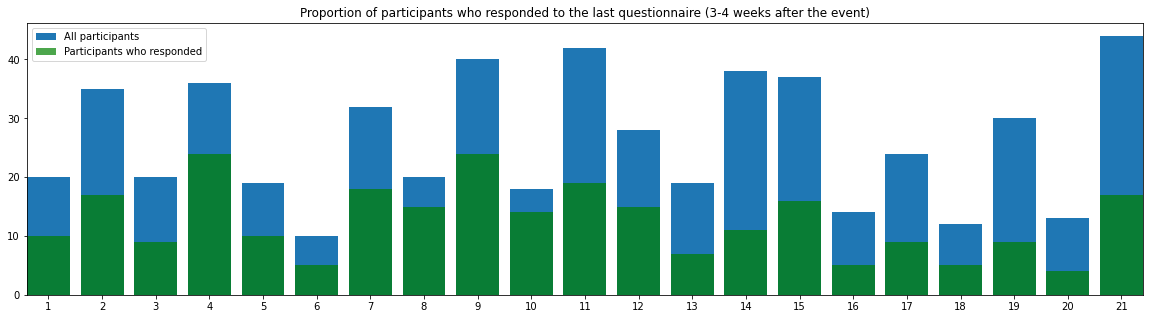

In [50]:
plt.figure(figsize=(20, 5))

plt.bar(speed_dating_weeks_after_df["wave"].drop_duplicates(),
        speed_dating_weeks_after_df.loc[(speed_dating_weeks_after_df["iid"].duplicated() == False), 
        "wave"].value_counts().sort_index(), 
        label="All participants"
       )
plt.bar(speed_dating_weeks_after_df["wave"].drop_duplicates(),
        speed_dating_weeks_after_df.loc[
        (speed_dating_weeks_after_df["iid"].duplicated() == False) & (speed_dating_weeks_after_df["you_call"].notnull()), 
        "wave"].value_counts().sort_index(), 
        label="Participants who responded",
        color='green',
        alpha=.7
       )

plt.xticks(speed_dating_weeks_after_df["wave"].drop_duplicates())
plt.xlim([0.6, 21.4])
plt.legend(loc='upper left')
plt.title("Proportion of participants who responded to the last questionnaire (3-4 weeks after the event)")

plt.show()

In [51]:
speed_dating_weeks_after_df = speed_dating_weeks_after_df[~speed_dating_weeks_after_df["you_call"].isnull()]

In [52]:
speed_dating_weeks_after_df.iloc[:, 13:].isnull().sum() / len(speed_dating_weeks_after_df) * 100

you_call     0.000000
them_cal     0.000000
date_3       0.000000
attr1_3      0.000000
sinc1_3      0.000000
intel1_3     0.000000
fun1_3       0.000000
amb1_3       0.000000
shar1_3      0.000000
attr2_3     25.541017
sinc2_3     25.541017
intel2_3    25.541017
fun2_3      25.541017
amb2_3      25.541017
shar2_3     49.270257
dtype: float64

In [53]:
speed_dating_weeks_after_df.shape

(3974, 28)

## Descriptive statistics

### During registration

In [54]:
speed_dating_during_registration_df.head()

,iid,gender,wave,round,age,field_cd,race,imprace,imprelig,goal,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1
0,1,0,1,10,21.0,1.0,4.0,2.0,4.0,2.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0
1,1,0,1,10,21.0,1.0,4.0,2.0,4.0,2.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0
2,1,0,1,10,21.0,1.0,4.0,2.0,4.0,2.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0
3,1,0,1,10,21.0,1.0,4.0,2.0,4.0,2.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0
4,1,0,1,10,21.0,1.0,4.0,2.0,4.0,2.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0


In [55]:
speed_dating_during_registration_df.shape

(8378, 40)

In [56]:
speed_dating_during_registration_df["iid"].nunique()

551

In [57]:
speed_dating_during_registration_df.loc[speed_dating_during_registration_df.duplicated(["iid"]) == False, "gender"].value_counts()

1    277
0    274
Name: gender, dtype: int64

551 people participated in these events, with an equal number of men and women (277 and 274 respectively).

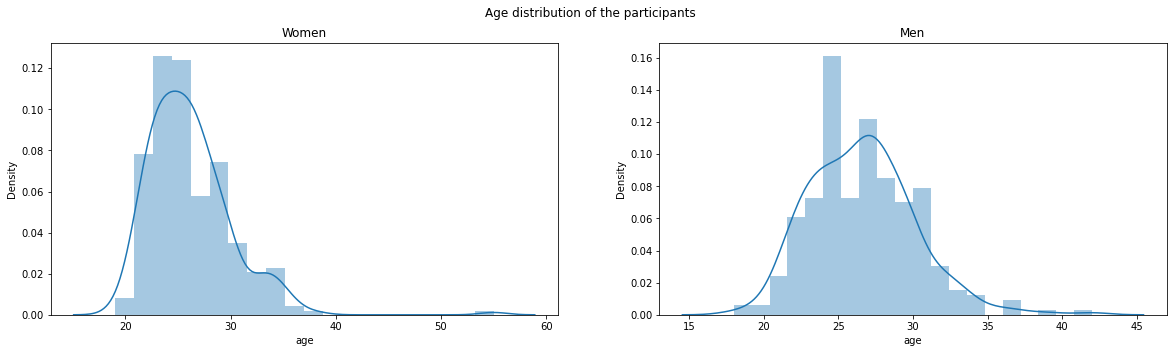

In [58]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(
    speed_dating_during_registration_df.loc[
        (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 0), 
        "age"
    ], 
    bins=20
)
plt.title("Women")

plt.subplot(122)
sns.distplot(
    speed_dating_during_registration_df.loc[
        (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 1), 
        "age"
    ], 
    bins=20
)
plt.title("Men")

plt.suptitle("Age distribution of the participants")
plt.show()

The participants are mostly between 20 and 35 years old. People aged 25 are the most numerous.

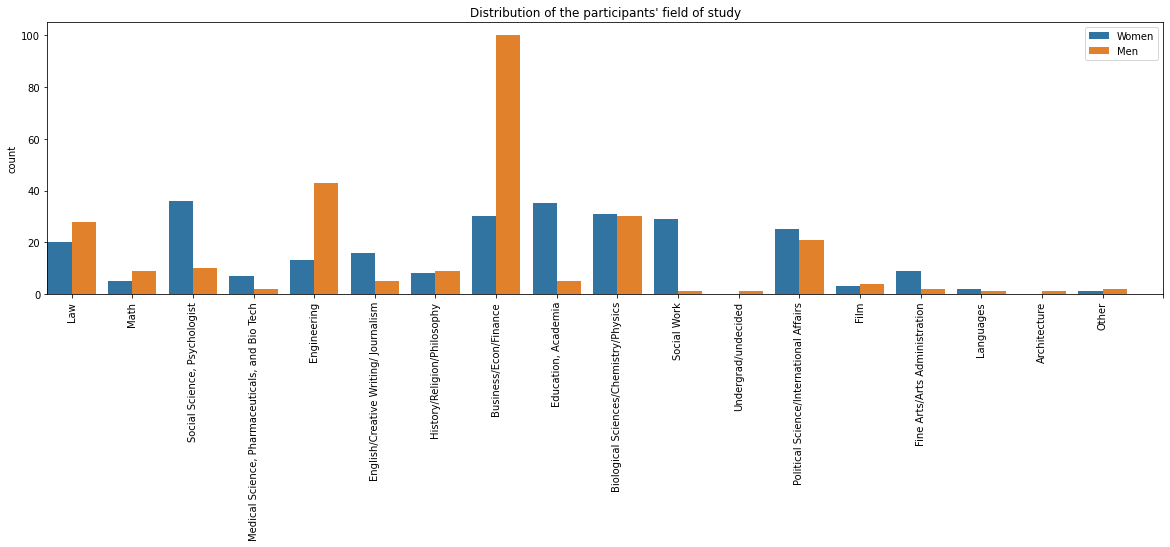

In [59]:
plt.figure(figsize=(20,5))

sns.countplot(data=speed_dating_during_registration_df.loc[
    (speed_dating_during_registration_df["iid"].duplicated() == False), ["field_cd", "gender"]],
              x="field_cd",
              hue="gender"
)

plt.xticks(list(range(0, 19)),
           ["Law", "Math", "Social Science, Psychologist", "Medical Science, Pharmaceuticals, and Bio Tech", "Engineering",
            "English/Creative Writing/ Journalism", "History/Religion/Philosophy", "Business/Econ/Finance", 
            "Education, Academia", "Biological Sciences/Chemistry/Physics", "Social Work", "Undergrad/undecided", 
            "Political Science/International Affairs", "Film", "Fine Arts/Arts Administration", "Languages", "Architecture",
            "Other"],
          rotation=90)
plt.legend(["Women", "Men"])
plt.xlim([-0.4, 18])
plt.xlabel('')
plt.title("Distribution of the participants' field of study")

plt.show()

* More than a third of the men who participated in these events are studying business. There are also many who are studying engineering.
* When comparing the proportion of men and women in each field of study, there are more women studying social sciences, education or social work than men.

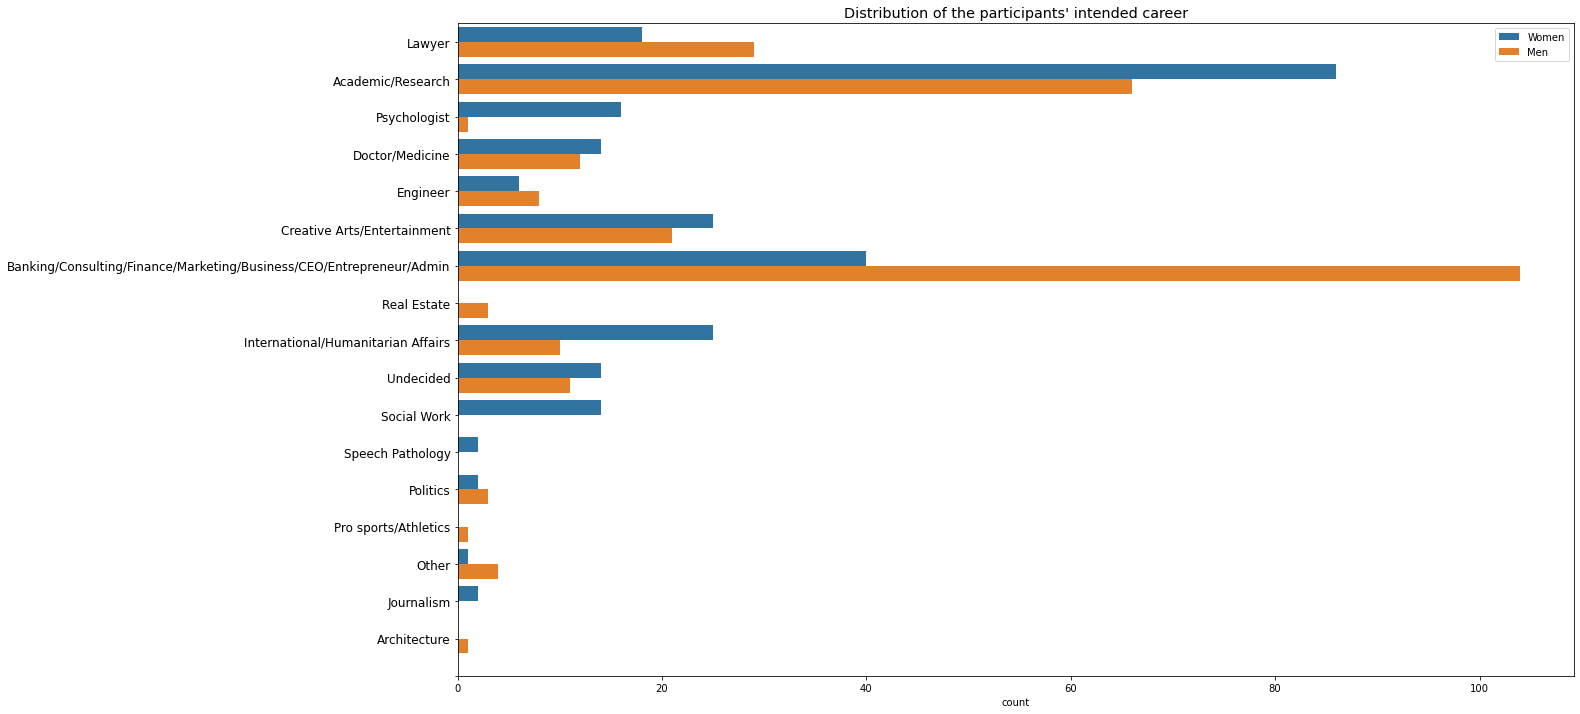

In [60]:
plt.figure(figsize=(20,12))

sns.countplot(data=speed_dating_during_registration_df.loc[
    (speed_dating_during_registration_df["iid"].duplicated() == False), ["career_c", "gender"]],
              y="career_c",
              hue="gender"
)
plt.legend(["Women", "Men"])
plt.yticks(list(range(0, 18)),
           ["Lawyer", "Academic/Research", "Psychologist", "Doctor/Medicine", "Engineer",
            "Creative Arts/Entertainment", "Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin", 
            "Real Estate", "International/Humanitarian Affairs", "Undecided", "Social Work", "Speech Pathology", 
            "Politics", "Pro sports/Athletics", "Other", "Journalism", "Architecture"],
          fontsize='large')
plt.ylabel('')
plt.title("Distribution of the participants' intended career", fontsize='x-large')

plt.show()

* It is not surprising that the largest number of men are those who want to pursue a career in banking, consulting, finance, marketing.
* There are also many women (almost 90) who want to pursue their career in academic / research.
* Few people in this sample intend to have a career in real estate, politics, journalism, athletics or architecture.

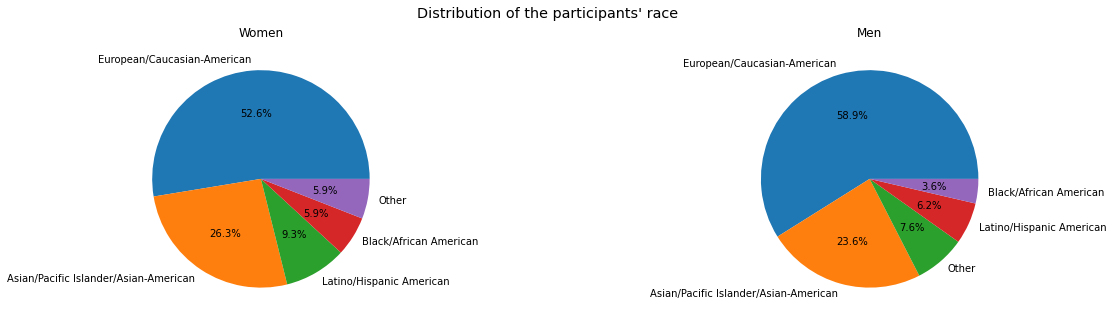

In [61]:
races = {1:"Black/African American", 2:"European/Caucasian-American", 3:"Latino/Hispanic American", 
         4:"Asian/Pacific Islander/Asian-American", 5:"Native American", 6:"Other"}

plt.figure(figsize=(20,5))

plt.subplot(121)
plt.pie(speed_dating_during_registration_df.loc[
        (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 0), 
        "race"
        ].value_counts(), 
        labels=[races[i] for i in speed_dating_during_registration_df.loc[
            (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 0), "race"]
                .value_counts()
                .index], 
        autopct='%1.1f%%'
    )
plt.title("Women", fontsize='large')

plt.subplot(122)
plt.pie(speed_dating_during_registration_df.loc[
        (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 1), "race"]
        .value_counts(), 
        labels=[races[i] for i in speed_dating_during_registration_df.loc[
            (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 1), "race"]
                .value_counts()
                .index], 
        autopct='%1.1f%%'
    )
plt.title("Men", fontsize='large')

plt.suptitle("Distribution of the participants' race", fontsize='x-large')
plt.show()

* The differences between male and female participants are small (less than 3% difference except for the majority class).
* More than half of the participants are European/Caucasian-American.

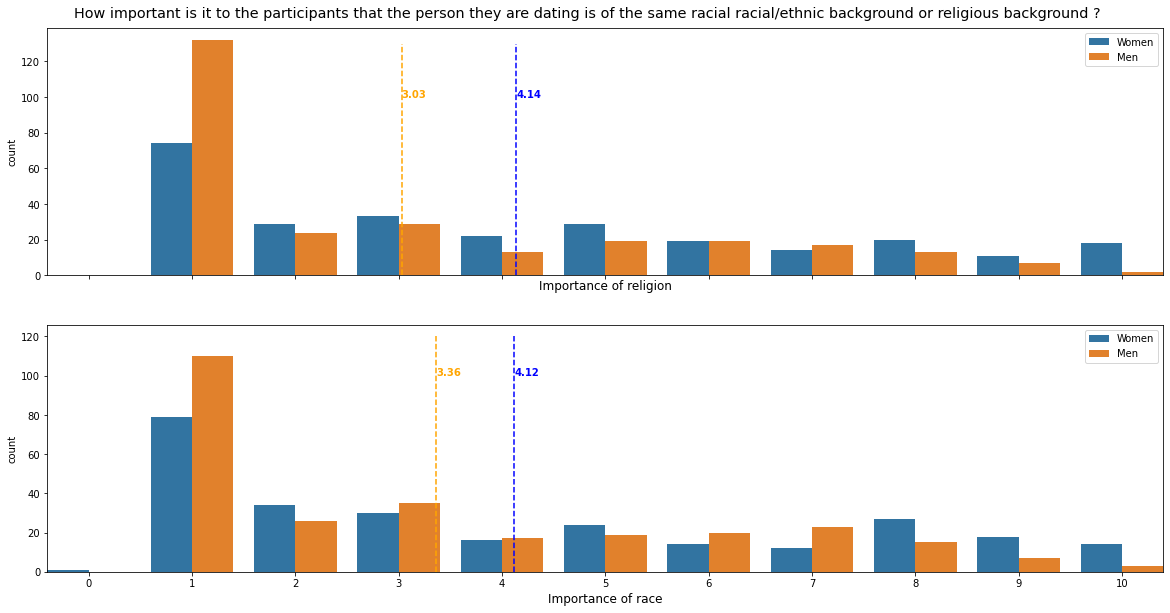

In [62]:
mean_imprace_men = round(speed_dating_during_registration_df.loc[
    (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 1), "imprace"]
           .mean(), 2)
mean_imprace_women = round(speed_dating_during_registration_df.loc[
    (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 0), "imprace"]
           .mean(), 2)
mean_imprelig_men = round(speed_dating_during_registration_df.loc[
    (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 1), "imprelig"]
           .mean(), 2)
mean_imprelig_women = round(speed_dating_during_registration_df.loc[
    (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 0), "imprelig"]
           .mean(), 2)

fig, axs = plt.subplots(2, 1, figsize=(20,10), sharex=True)

sns.countplot(data=speed_dating_during_registration_df.loc[
    (speed_dating_during_registration_df["iid"].duplicated() == False), ["imprelig", "gender"]],
              x="imprelig",
              hue="gender",
              order=list(range(11)),
              ax=axs[0]
)
axs[0].text(mean_imprelig_women, 100, mean_imprelig_women, color='blue', fontweight='bold')
axs[0].text(mean_imprelig_men, 100, mean_imprelig_men, color='orange', fontweight='bold')
axs[0].legend(["Women", "Men"])
axs[0].set_xlim(-0.4, 10.4)
axs[0].set_xlabel('Importance of religion', fontsize='large')
axs[0].vlines(x=mean_imprelig_women,  
           ymin=0,
           ymax=130,
           linestyles='dashed', 
           colors='blue')
axs[0].vlines(x=mean_imprelig_men,  
           ymin=0,
           ymax=130,
           linestyles='dashed', 
           colors='orange')

sns.countplot(data=speed_dating_during_registration_df.loc[
    (speed_dating_during_registration_df["iid"].duplicated() == False), ["imprace", "gender"]],
              x="imprace",
              hue="gender",
              order=list(range(11)),
              ax=axs[1]
)
axs[1].text(mean_imprace_women, 100, mean_imprace_women, color='blue', fontweight='bold')
axs[1].text(mean_imprace_men, 100, mean_imprace_men, color='orange', fontweight='bold')
axs[1].legend(["Women", "Men"])
axs[1].set_xlim(-0.4, 10.4)
axs[1].set_xlabel('Importance of race', fontsize='large')
axs[1].vlines(x=mean_imprace_women,  
           ymin=0,
           ymax=120,
           linestyles='dashed', 
           colors='blue')
axs[1].vlines(x=mean_imprace_men,  
           ymin=0,
           ymax=120,
           linestyles='dashed', 
           colors='orange')

plt.suptitle("How important is it to the participants that the person they are dating is of the same racial racial/ethnic background or \
religious background ?", y=0.91, fontsize='x-large')
plt.show()

* The religion and race of the partner is less important to men than to women.
* More than 100 male participants are very unconcerned about their partner's race and religion.
* At the extremes (above 8), race and religion are more important to women than to men, although fewer than 60 of each gender are concerned.

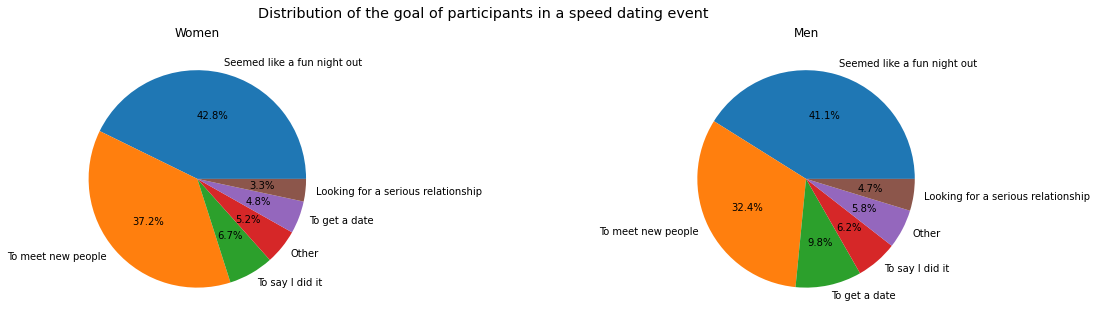

In [63]:
goals = {1:"Seemed like a fun night out", 2:"To meet new people", 3:"To get a date", 
         4:"Looking for a serious relationship", 5:"To say I did it", 6:"Other"}

plt.figure(figsize=(20,5))

plt.subplot(121)
plt.pie(speed_dating_during_registration_df.loc[
        (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 0), 
        "goal"
        ].value_counts(), 
        labels=[goals[i] for i in speed_dating_during_registration_df.loc[
            (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 0), "goal"]
                .value_counts()
                .index], 
        autopct='%1.1f%%'
    )
plt.title("Women", fontsize='large')

plt.subplot(122)
plt.pie(speed_dating_during_registration_df.loc[
        (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 1), "goal"]
        .value_counts(), 
        labels=[goals[i] for i in speed_dating_during_registration_df.loc[
            (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 1), "goal"]
                .value_counts()
                .index], 
        autopct='%1.1f%%'
    )
plt.title("Men", fontsize='large')

plt.suptitle("Distribution of the goal of participants in a speed dating event", fontsize='x-large')
plt.show()

* In our dataset, three quarters of participants (both women and men) attended these events in order to have fun or to meet new people.
* Almost 10% of men came to get a date,  while less than 5% of women came for that purpose.
* Very few people registered for these events to look for a serious relationship (3.3% of women and 4.7% of men).

In [64]:
def plot_rate_attribute(field, title):
    sns.barplot(data=speed_dating_during_registration_df.loc[
                    speed_dating_during_registration_df["iid"].duplicated() == False,
                    [field, "gender"]],
                y=field, 
                x="gender",
               ci=None)
    plt.xticks([0, 1], ["Women", "Men"])
    plt.ylabel('')
    plt.xlabel('')
    plt.ylim(0, 28)
    plt.title(title)

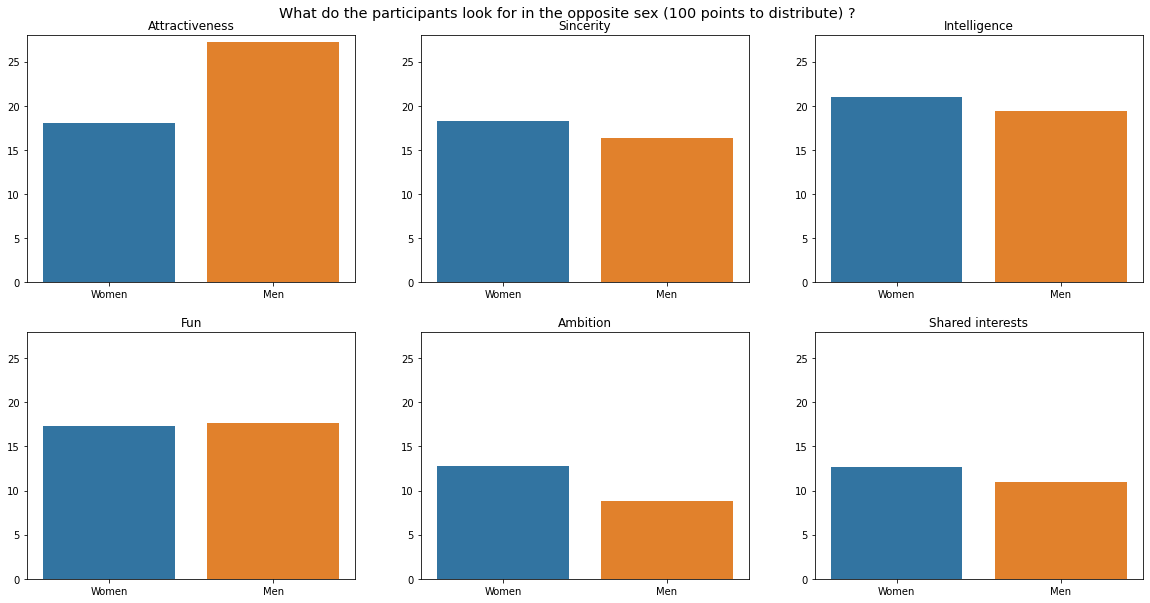

In [65]:
plt.figure(figsize=(20,10))

fields = {"Attractiveness":"attr1_1",
          "Sincerity":"sinc1_1",
          "Intelligence":"intel1_1",
          "Fun":"fun1_1",
          "Ambition":"amb1_1",
          "Shared interests":"shar1_1"
         }

for ind, element in enumerate(fields):
    plt.subplot(int(str(23) + str(ind + 1)))
    plot_rate_attribute(fields[element], element)

plt.suptitle("What do the participants look for in the opposite sex (100 points to distribute) ?", fontsize='x-large', y=0.92)
plt.show()

* Attractiveness is very important for men : they gave an average score of more than 25 points out of 100 to this attribute whereas women gave it an average score of less than 20.
* The least important attribute for men is ambition (average score below 10).
* The most important attribute for women is intelligence (average score above 20) and the least important attributes are ambition and shared interests.

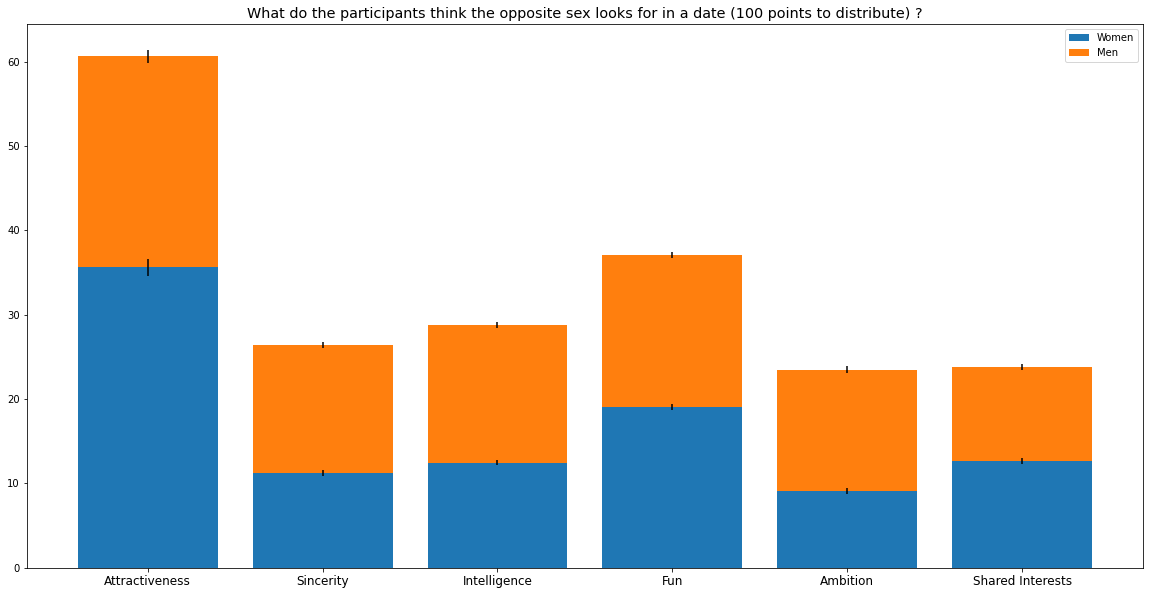

In [66]:
plt.figure(figsize=(20, 10))

labels = ['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition', 'Shared Interests']

means_women = speed_dating_during_registration_df.loc[
    (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 0), 
    ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].mean().values
means_men = speed_dating_during_registration_df.loc[
    (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 1), 
    ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].mean().values
ci_women = speed_dating_during_registration_df.loc[
    (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 0), 
    ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].std().values * 0.96 / np.sqrt(274)
ci_men = speed_dating_during_registration_df.loc[
    (speed_dating_during_registration_df["iid"].duplicated() == False) & (speed_dating_during_registration_df["gender"] == 1), 
    ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].std().values * 0.96 / np.sqrt(277)

plt.bar(labels, means_women, yerr=ci_women, label="Women")
plt.bar(labels, means_men, yerr=ci_men, label="Men", bottom=means_women)
plt.xticks(fontsize='large')
plt.title("What do the participants think the opposite sex looks for in a date (100 points to distribute) ?", fontsize='x-large')
plt.legend()

plt.show()

* Women think that the most important attribute for men is attractiveness as the average score given is about 35 points. We have seen that they are not wrong.
* According to women, ambition is the least important attribute for men (average score below 10). Here again, they are right.
* Men think that the most important attribute for women is attractiveness with an average score of 25, and they believe that having shared interests is the least important attribute (average score just above 10). They are right on this last point.
* It seems that women know men better than they do.

## At this stage of the analysis

We summarise the main points in our view:
* Race and religion do not really matter to the participants.
* The vast majority of participants came to these events to meet new people and have fun.
* On average, the first attribute that men look for in women is attractiveness, while women look for intelligence first.
* On average, women know that men look for attractiveness when they meet and that men do not look for ambition in women.

## Next step : Descriptive statictics of other moments of an event

We export the sub-dataframes for further analysis. We will finish exploring the data in the second part of Data Understanding phase.

In [67]:
speed_dating_during_registration_df.to_csv("during_registration.csv", index=False)
speed_dating_during_event_df.to_csv("during_event.csv", index=False)
speed_dating_day_after_df.to_csv("day_after.csv", index=False)
speed_dating_weeks_after_df.to_csv("weeks_after.csv", index=False)